# Project: TMDP Movies Data Analysis 
## Renad Alowibdi 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDP movie data set was chosen to be analyzed throughout this project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In more details, it includes 21 columns represent each movie's ID, the IMDb ID, the popularity, the budget for releasing the movie, the resultant revenue, the original title, the cast involved in the movie, the original homepage for the movie, the direct director, the movie tag line, the keywords that describe the movie, the overview of the movie, the production company, the genres that best describe the movie, and the movie playing time. In addition, the columns also include the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. Interesting columns also show the released date, released year, the total count of people voted for the movie, and the average result of the votes. 

This project is focusing on answering three questions by using DataFrames, Pandas Series, and NumPy arrays appropriately. The questions are:

1-  Who are the top directors in the 1960 year, who their published movies got high ratings?

2-  Do high votes affect the revenue in gaining more money?


3- Do modern 21st-century movies or old movies represent the most significant portion of the data set? 

In [177]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data will be loaded and checked for cleanliness to make sure that the data are in high quality. The included steps in data wrangling are gathering data, asses data ,and, finally clean data. 

### General Properties
The first step stands for gathering data. In this project, the data were given, so it is just imported directly into Jupyter. The first five rows will be shown to understand the nature of data

In [33]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


 **In the second step, the data were assessed to view the following:**
- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- datatypes of columns
- features with missing values
- number of non-null unique values for features in each dataset


Each cell's output will be supported by a discussion right below it. 


In [34]:
df.shape

(10866, 21)

From the code above, we can say that the data contain 21 columns (features) and 10866 rows (movies)

In [36]:
sum(df.duplicated())

1

The code above has shown that the data have 1 duplicated row

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [40]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**The data types are correct, however, it is better to change the following for high quality cleaned data:**

- Change revenue and budget data type from integer to float type 
- Change release date from string to date type 

**the data have missing values and they vare varied between 9 different columns as follows:**

- imdb_id feature has 10 missing values 
- cast feature has 76 missing values 
- homepage feature has 7930 missing values 
- director feature has 44 missing values 
- tagline feature has 2824 missing values 
- keywords feature have 1493 missing values 
- overview feature has 4 missing values
- genres feature has 23 missing values
- production_companies feature has 1030 missing values




In [38]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

The code above, shows the number of non-null unique values for each features

In [39]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Interesting findings from the previous statistics output are:**

- The minimum vote count for a movie was 10 votes
- The maximum vote count for a movie was 9767 votes
- The oldest movie was released at 1960
- The newest movie was released at 2015 

### Cleaning Part

In this part, the data will be cleaned to be more consistent and appropriate to use. First of all, the duplicated row will be dropped as follows:

In [41]:
df.drop_duplicates(inplace=True)

In [43]:
# checking if the data are empty from duplicats: 
df.duplicated().sum()

0

Secondly, the un-useful columns that contain missing values will be dropped, and they are: imdb_id, cast, homepage, tagline, keyword, overview and production companies. The code below shows this step. 

In [48]:
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [49]:
# checking for remaining missing values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

By this, the data set got rid of a large number of missing values. However, the data still have 44 missing values from the director feature and 23 missing values from genres feature, dropping these missing rows is fine since they are considered as few amount in comparison to the total numbers of rows for the data set. The code below will work for this step.  

In [50]:
df.dropna(inplace=True)

At the end of getting rid of missing values, it is important to check if the data do not contain any missing values. The code below will confirm this by having 'false' output.

In [51]:
df.isnull().sum().any()

False

The final step in cleaning this data set is changing the incorrect data type to its consistent type as follows:

In [53]:
# from string to date time type (release date column)
df['release_date']= pd.to_datetime(df['release_date'])

In [55]:
# from integer to float type (revenue and budget columns)
df['revenue']= df['revenue'].astype(float)
df['budget']= df['budget'].astype(float)

In [56]:
# checking the data types after the changes made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10800 non-null  int64         
 1   popularity      10800 non-null  float64       
 2   budget          10800 non-null  float64       
 3   revenue         10800 non-null  float64       
 4   original_title  10800 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10800 non-null  int64         
 7   genres          10800 non-null  object        
 8   release_date    10800 non-null  datetime64[ns]
 9   vote_count      10800 non-null  int64         
 10  vote_average    10800 non-null  float64       
 11  release_year    10800 non-null  int64         
 12  budget_adj      10800 non-null  float64       
 13  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)


In [57]:
# observe the changes made to the release_date column after changing it's type 
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


The data now are cleaned and ready to be explored to answer the project questions. 

<a id='eda'></a>
## Exploratory Data Analysis

In this section of the project, the data will be explored to maximize the potentials of the analysis, visualization, and models and then build intuition of the project questions 

### Question 1) Who are the top directors in the 1960 year, who their published movies got high ratings?

First a new custom data frame was made to contain the data for the required year only 

In [178]:
df_year= df.query('release_year in ["1960"]')
# check the result
df_year.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10141,539,2.610362,806948.0,32000000.0,Psycho,Alfred Hitchcock,109,Drama|Horror|Thriller,2060-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08
10142,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,John Sturges,128,Action|Adventure|Western,2060-10-23,224,7.0,1960,1.474593e+07,3.616441e+07
10143,967,1.136943,12000000.0,60000000.0,Spartacus,Stanley Kubrick,197,Action|Drama|History,1960-10-06,211,6.9,1960,8.847561e+07,4.423780e+08
10144,284,0.947307,3000000.0,25000000.0,The Apartment,Billy Wilder,125,Comedy|Drama|Romance,2060-06-15,235,7.9,1960,2.211890e+07,1.843242e+08
10145,24014,0.875173,0.0,0.0,Let's Make Love,George Cukor,114,Comedy|Romance,1960-10-07,15,4.9,1960,0.000000e+00,0.000000e+00


secondly, calculate the median to split the votes below or above the median. 

In [114]:
median= df_year['vote_average'].median()
median

6.25

Below the median will be considered as low ratings, above the median will be considered as high ratings. Before proceeding to answer the question, it's recommended to understand the statistics nature of these low and high data to be able to observe the variables and plot a bar chart. 

In [124]:
low = df.query('vote_average < {}'.format(median)) 
high= df.query('vote_average >= {}'.format(median))
mean_vote_low = low['vote_average'].mean() #Calculating the mean of high ratings 
mean_vote_high = high['vote_average'].mean() #Calculating the mean of low ratings
print(mean_vote_low,mean_vote_high) # Print the answers 

5.389068763490583 6.845618915159936


Text(0, 0.5, 'Vote Average')

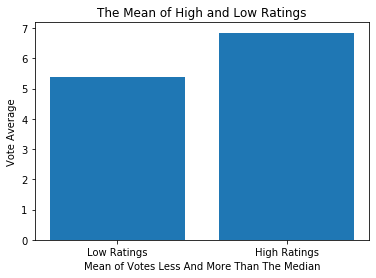

In [182]:
# Plotting a bar chart 
locations = [1, 2]
heights = [mean_vote_low, mean_vote_high]
labels = ['Low Ratings', 'High Ratings']
plt.bar(locations, heights, tick_label=labels)
plt.title('The Mean of High and Low Ratings')
plt.xlabel('Mean of Votes Less And More Than The Median')
plt.ylabel('Vote Average')

The bar chart above represents the top director's mean ratings are naturally as expected is more than the mean ratings of other directors. 

In order to answer the question, first, the vote average for each director's movies were founded and computed their mean for duplicated directors name

In [183]:
director_mratings= df_year.groupby('director')['vote_average'].mean()
director_mratings

director
Alfred Hitchcock        8.00
Billy Wilder            7.90
Budd Boetticher         6.50
David Miller            5.70
David Swift             7.20
Don Siegel              5.90
Frank Tashlin           7.20
George Cukor            4.90
George Pal              7.30
Gerald Thomas           6.00
Irwin Allen             6.00
Jerry Lewis             7.00
John Ford               5.20
John Huston             4.90
John Llewellyn Moxey    6.10
John Sturges            7.00
John Wayne              6.20
Karel Reisz             5.60
Ken Annakin             6.90
Lewis Gilbert           4.90
Lewis Milestone         6.60
Michael Powell          7.40
Otto Preminger          6.10
Richard Brooks          6.30
Roger Corman            5.95
Stanley Donen           4.90
Stanley Kramer          6.80
Stanley Kubrick         6.90
Terence Fisher          6.60
William Castle          5.50
Wolf Rilla              7.00
Name: vote_average, dtype: float64

Now, the data (director_mratings) is ready for comparison, once the average director's movie ratings are greater than the median, the director will be a top director with a boolean result (yes)

In [184]:
top_directors = director_mratings > median
top_directors

director
Alfred Hitchcock         True
Billy Wilder             True
Budd Boetticher          True
David Miller            False
David Swift              True
Don Siegel              False
Frank Tashlin            True
George Cukor            False
George Pal               True
Gerald Thomas           False
Irwin Allen             False
Jerry Lewis              True
John Ford               False
John Huston             False
John Llewellyn Moxey    False
John Sturges             True
John Wayne              False
Karel Reisz             False
Ken Annakin              True
Lewis Gilbert           False
Lewis Milestone          True
Michael Powell           True
Otto Preminger          False
Richard Brooks           True
Roger Corman            False
Stanley Donen           False
Stanley Kramer           True
Stanley Kubrick          True
Terence Fisher           True
William Castle          False
Wolf Rilla               True
Name: vote_average, dtype: bool

The director's name with a boolean result (true) is a top director, where, the director's name with a boolean result (false) is not a top director

### Question 2) Do high ratings affect the revenue in gaining more money?

This question aims to analyze the relationship between high ratings and revenue. 

Analyzing this relation requires understanding what is considered as high ratings. In this question, the mean of the whole (average_vote) column is calculated as a reference point. 

In [185]:
# Calculating the mean 
mean_vote= df['vote_average'].mean()
mean_vote

5.970879629629648

Addressing the high rating votes when they are greater than the mean.  

In [203]:
high_votes=df.query('vote_average >= {}'.format(mean_vote))
high_votes

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,13343,0.141026,700000.0,0.000000e+00,The Ghost & Mr. Chicken,Alan Rafkin,90,Comedy|Family|Mystery|Romance,2066-01-20,14,6.1,1966,4.702610e+06,0.000000e+00
10859,20620,0.089072,0.0,0.000000e+00,Seconds,John Frankenheimer,100,Mystery|Science Fiction|Thriller|Drama,1966-10-05,22,6.6,1966,0.000000e+00,0.000000e+00
10860,5060,0.087034,0.0,0.000000e+00,Carry On Screaming!,Gerald Thomas,87,Comedy,2066-05-20,13,7.0,1966,0.000000e+00,0.000000e+00
10861,21,0.080598,0.0,0.000000e+00,The Endless Summer,Bruce Brown,95,Documentary,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00


The code below is used to plot the variables to observe the relationship. 

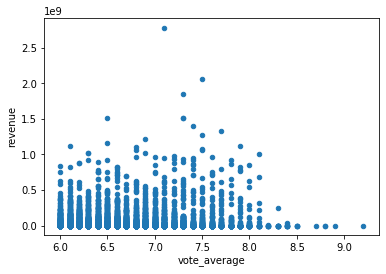

In [204]:
high_votes.plot(x='vote_average',y='revenue', kind='scatter');

the graph shows that the variables do not follow a specific pattern. It's obvious that there is no relationship between high ratings and revenues

### Question 3) Do modern 21st-century movies or old movies represent the most significant portion of the data set? 



The original data must be split into two types, old movies, and modern movies. Each movie will be classified into these two types depending on it's released year as follows: 

In [187]:
old_movies = df.query('release_year < 2001')
modern_movies= df.query('release_year >= 2001')

Now, it's easy to analyze the data. But first, due to unexpected anaconda3 error, It was necessary to save the (old_movies and modern_movies) data frames and re-upload it to avoid the version error limitations.

In [188]:
old_movies.to_csv('old_movies.csv', index=False)
modern_movies.to_csv('modern_movies.csv', index=False)

In [189]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
old_movies=pd.read_csv('old_movies.csv')
modern_movies=pd.read_csv('modern_movies.csv')

Here, by using NumPy, an array was created to add a column with a name (type) to the old_movies data set that will contain the string (old) that describes the movie type. Same thing was done to the modern movies type. 

In [190]:
old_type=np.repeat('old',old_movies.shape[0])
old_movies['type']=old_type
old_movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,type
0,11,12.037933,11000000.0,775398007.0,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,old
1,691,2.379469,14000000.0,185438673.0,The Spy Who Loved Me,Lewis Gilbert,125,Adventure|Action|Thriller,1977-07-07,279,6.2,1977,5.036893e+07,6.671677e+08,old
2,11319,1.719385,1200000.0,71215869.0,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy|Family|Animation|Adventure,1977-06-22,332,6.6,1977,4.317337e+06,2.562191e+08,old
3,703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977-04-19,493,7.6,1977,1.439112e+07,1.376203e+08,old
4,11114,1.104997,10000000.0,0.0,Pete's Dragon,Don Chaffey,128,Fantasy|Animation|Comedy|Family,1977-11-03,113,6.4,1977,3.597781e+07,0.000000e+00,old


In [191]:
modern_type=np.repeat('new',modern_movies.shape[0])
modern_movies['type']=modern_type
modern_movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,type
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,new
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,new
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,new
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,new
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,new


The two data set are combined into one data frame with a name (movies_df), which will help in plotting the pie chart to answer the third question. 

In [192]:
movies_df = old_movies.append(modern_movies, sort=False)

Text(0.5, 1.0, 'Percentage of Movies Type')

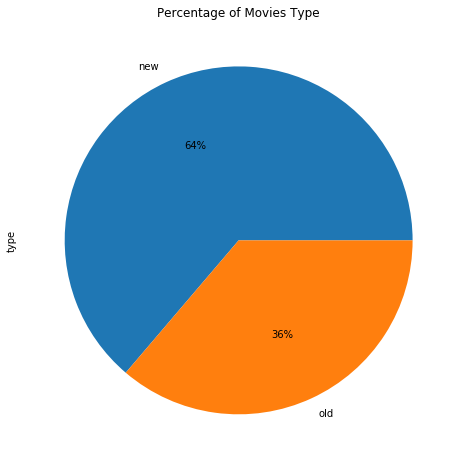

In [195]:
movies_df['type'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,8)); #Plotting the pie chart
plt.title('Percentage of Movies Type')

It can be noticed obviously that modern movies represent the largest portion of the pie chart with 64%. Hence, the most significant portion of the data set. While, the old movies represent 36% only. 

<a id='conclusions'></a>
## Conclusions

The questions that were answered are limited; there are more ways and more areas to ask about this data set. In the first question, it can be found that getting high ratings for a movie will distinguish the director from the rest of them. This does not mean that the movie was rated high cause of the director himself; it means that the movie's different characteristics had added value to the director when the movie was rated high. The different characteristics are also represented in the data list, such as the genres, but due to the limitations in separating the pipe (|) characters, it was not easy to analyze the genres. However, there are advanced ways to do it. In the second question, from the scatter plot, it's clear that the movie watcher rating does not affect the gained revenue. After studying this point, it was founded that the movie watcher will pay in both cases, even with a low rating, and there are many ways to increase revenue like marketing. It is worth to mention that the revenue contains many zero values that have affected the analyzing here and considered as a limitation to this case. The last question aimed to understand which type of movies (old or modern) represent the largest portion of the data. This was important to take into consideration the effecting aspects to the data set, like the different  kinds of generations who have watched these movies with different opinions depending on the time they have lived in. Also, the evaluation of technologies can affect the study. The result has shown that more than half of the data set are modern movies, which means the data set was affected by the modern generation and modern technologies. 